#### load library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Model

#### read data

In [5]:
data = pd.read_parquet('dataset_1A.parquet', engine='pyarrow')

#### about the data

In [8]:
data.head(10)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,8,3,Sunday,Yes,24.492063,59.969085,1403.454805,7,On,Off,29.965327,82.05735763545306
1,1,8,Wednesday,No,26.312114,51.408711,1220.547133,8,On,Off,5.986875,83.88917674427188
2,1,19,Sunday,Yes,20.516186,40.918500,1114.230124,8,Off,On,20.489098,66.20209750906106
3,7,3,Wednesday,Yes,20.879426,46.859237,1096.207227,7,Off,On,21.321157,66.43917871187017
4,10,17,Saturday,No,23.015216,48.998158,1999.982252,1,Off,Off,3.966075,76.90227179904673
5,4,0,Friday,No,29.998671,56.916161,1476.481588,2,Off,On,29.658899,77.37623840403519
6,2,9,Tuesday,Yes,22.264567,40.735752,1315.024311,1,Off,Off,20.540906,68.01886834133008
7,8,7,Monday,Yes,25.306761,38.954020,1488.120021,8,Off,On,0.006642,80.27074038466411
8,5,20,Thursday,Yes,20.007565,59.969085,1473.525806,2,Off,Off,12.747546,60.39682634809089
9,10,13,Saturday,No,29.894112,57.188471,1880.476707,6,Off,Off,23.697130,94.97855661120568


In [9]:
data.tail()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
1227,9,2,Saturday,No,29.412360,47.368427,1905.249762,3,On,Off,9.602456,79.74911905310127
1228,6,16,Saturday,Yes,24.019593,59.272447,1274.096723,9,Off,On,21.973733,72.93770990438871
1229,1,1,Tuesday,No,21.926454,44.605974,1135.054165,5,On,On,4.858261,77.02412225998496
1230,3,2,Monday,No,24.581719,32.637069,1295.556323,5,Off,Off,1.763935,71.75136050151936
1231,12,17,Sunday,Yes,22.229281,46.942542,1330.187266,6,On,On,20.657222,72.10855378660037


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1232 non-null   object 
 1   Hour               1232 non-null   int64  
 2   DayOfWeek          1232 non-null   object 
 3   Holiday            1232 non-null   object 
 4   Temperature        1232 non-null   float64
 5   Humidity           1232 non-null   float64
 6   SquareFootage      1232 non-null   float64
 7   Occupancy          1232 non-null   int64  
 8   HVACUsage          1232 non-null   object 
 9   LightingUsage      1232 non-null   object 
 10  RenewableEnergy    1232 non-null   float64
 11  EnergyConsumption  1232 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 115.6+ KB


In [14]:
print(data.isnull().sum())

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


In [15]:
unique_values = data.nunique()
print("Unique values per column:")
print(unique_values)

Unique values per column:
Month                  15
Hour                   24
DayOfWeek               7
Holiday                 2
Temperature          1095
Humidity             1120
SquareFootage        1156
Occupancy              11
HVACUsage               2
LightingUsage           2
RenewableEnergy      1101
EnergyConsumption    1213
dtype: int64


In [18]:
data.describe()

,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,11.192370,24.887052,45.749180,1511.599284,4.607143,15.339704
std,6.941171,3.045583,9.083050,297.219745,2.905757,9.225973
min,0.000000,20.007565,30.015975,1000.512661,-5.000000,0.006642
25%,5.000000,22.385226,38.022993,1258.359797,2.000000,7.638064
50%,11.000000,24.716913,46.152351,1504.978812,5.000000,15.601873
75%,17.000000,27.305707,53.317264,1773.253483,7.000000,23.118105
max,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327


#### label encoding

In [169]:
label_encoder = LabelEncoder()

data['Holiday'] = label_encoder.fit_transform(data['Holiday'])
data['HVACUsage'] = label_encoder.fit_transform(data['HVACUsage'])
data['LightingUsage'] = label_encoder.fit_transform(data['LightingUsage'])

print(data.head())

  Month  Hour  Holiday  Temperature   Humidity  SquareFootage  Occupancy  \
0     8     3        1    24.492063  59.969085    1403.454805          7   
1     1     8        0    26.312114  51.408711    1220.547133          8   
2     1    19        1    20.516186  40.918500    1114.230124          8   
3     7     3        1    20.879426  46.859237    1096.207227          7   
4    10    17        0    23.015216  48.998158    1999.982252          1   

   HVACUsage  LightingUsage  RenewableEnergy  EnergyConsumption  \
0          1              0        29.965327          82.057358   
1          1              0         5.986875          83.889177   
2          0              1        20.489098          66.202098   
3          0              1        21.321157          66.439179   
4          0              0         3.966075          76.902272   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0                 0                   0                 1  

untuk kolom holiday "yes" menjadi "1" dan "no" menjadi "0"
<br>sedangkan kolom HVACUsage dan LightingUsage nilai "On" menjadi "1" dan "Off" menjadi "0"

#### cek unique value dari kolom "month"

In [25]:
print(data['Month'].unique())

['8' '1' '7' '10' '4' '2' '5' '6' '11' '9' '12' '3' 'Sep' 'July'
 'September']


konsistensi dalam kolom "month"

In [28]:
data['Month'] = data['Month'].replace({
    'September': '9',
    'Sep': '9',
    'July': '7'
})

print(data['Month'].unique())

['8' '1' '7' '10' '4' '2' '5' '6' '11' '9' '12' '3']


"September" dan "Sep" diubah menjadi 9 sedangkan "July" diubah menjadi "7"

#### one-hot encoding

In [32]:
data = pd.get_dummies(data, columns=['DayOfWeek'], drop_first=True)

# Mengonversi nilai True/False menjadi 1/0 menggunakan replace
data = data.replace({True: 1, False: 0})

data = data.infer_objects(copy=False)

print(data.head())

  Month  Hour  Holiday  Temperature   Humidity  SquareFootage  Occupancy  \
0     8     3        1    24.492063  59.969085    1403.454805          7   
1     1     8        0    26.312114  51.408711    1220.547133          8   
2     1    19        1    20.516186  40.918500    1114.230124          8   
3     7     3        1    20.879426  46.859237    1096.207227          7   
4    10    17        0    23.015216  48.998158    1999.982252          1   

   HVACUsage  LightingUsage  RenewableEnergy  EnergyConsumption  \
0          1              0        29.965327  82.05735763545306   
1          1              0         5.986875  83.88917674427188   
2          0              1        20.489098  66.20209750906106   
3          0              1        21.321157  66.43917871187017   
4          0              0         3.966075  76.90227179904673   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0                 0                   0                 1  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15652\2780819077.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


## No.1A EDA

#### Visualisasi distribusi fitur numerik: Temperature, EnergyConsumption, Humidity

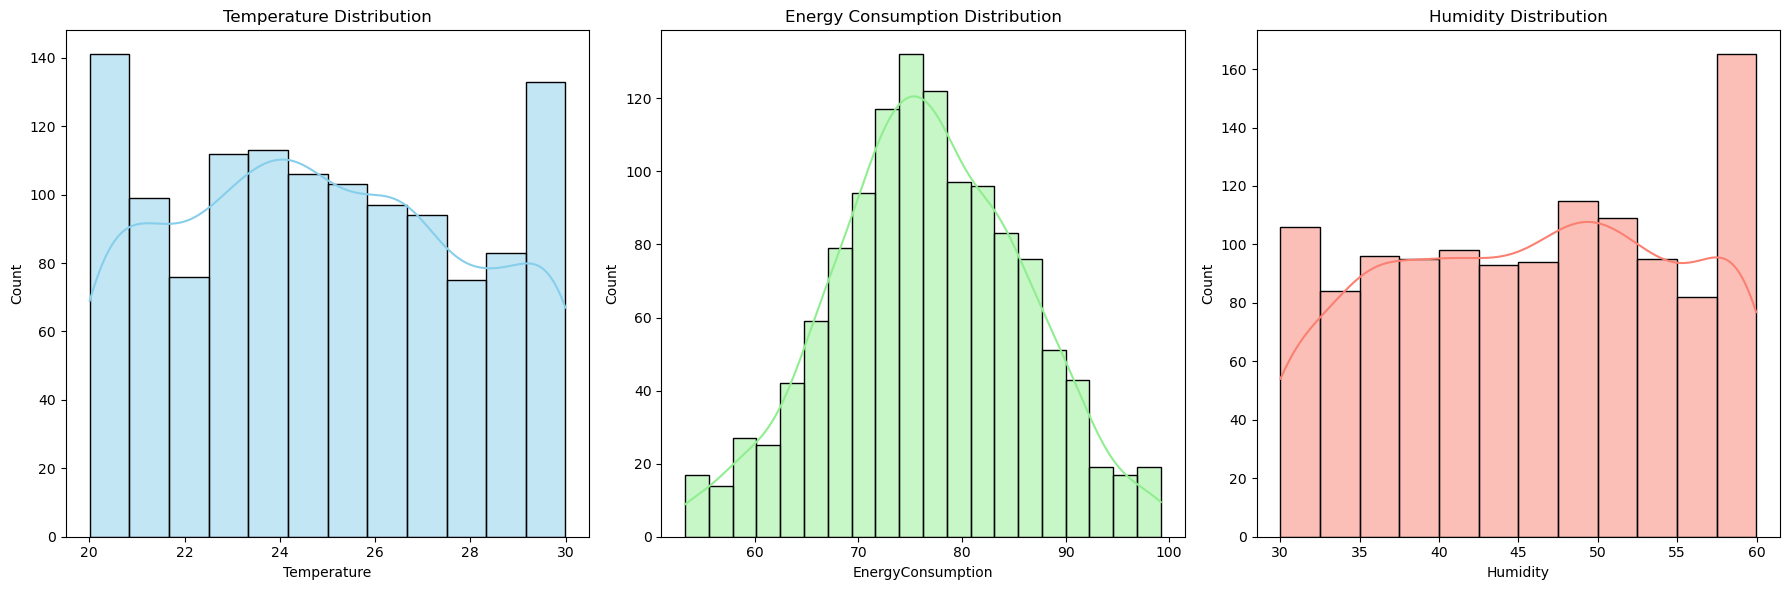

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature
sns.histplot(data['Temperature'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Temperature Distribution')

# Energy Consumption
sns.histplot(data['EnergyConsumption'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Energy Consumption Distribution')

# Humidity
sns.histplot(data['Humidity'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Humidity Distribution')

plt.tight_layout()
plt.show()

#### boxplot

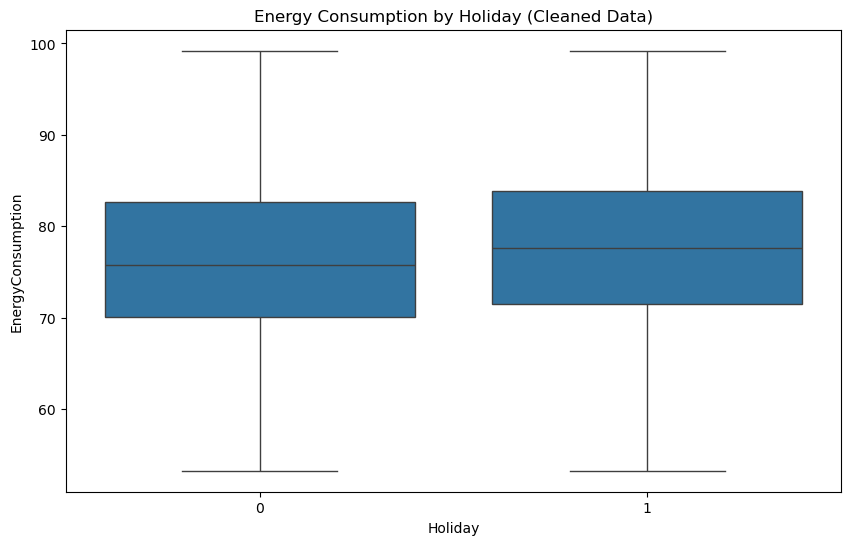

In [37]:
data['EnergyConsumption'] = pd.to_numeric(data['EnergyConsumption'], errors='coerce')

# Menentukan rentang nilai yang tidak termasuk outliers (misalnya, 53.26 dan 99.20)
lower_bound = 53.263278
upper_bound = 99.201120

# Menghapus baris dengan nilai EnergyConsumption yang sangat rendah atau sangat tinggi
data_cleaned = data[(data['EnergyConsumption'] >= lower_bound) & (data['EnergyConsumption'] <= upper_bound)]

# Menampilkan boxplot setelah membersihkan outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday', y='EnergyConsumption', data=data_cleaned)
plt.title('Energy Consumption by Holiday (Cleaned Data)')
plt.show()

#### heatmap untuk korelasi

<Figure size 1600x1200 with 0 Axes>

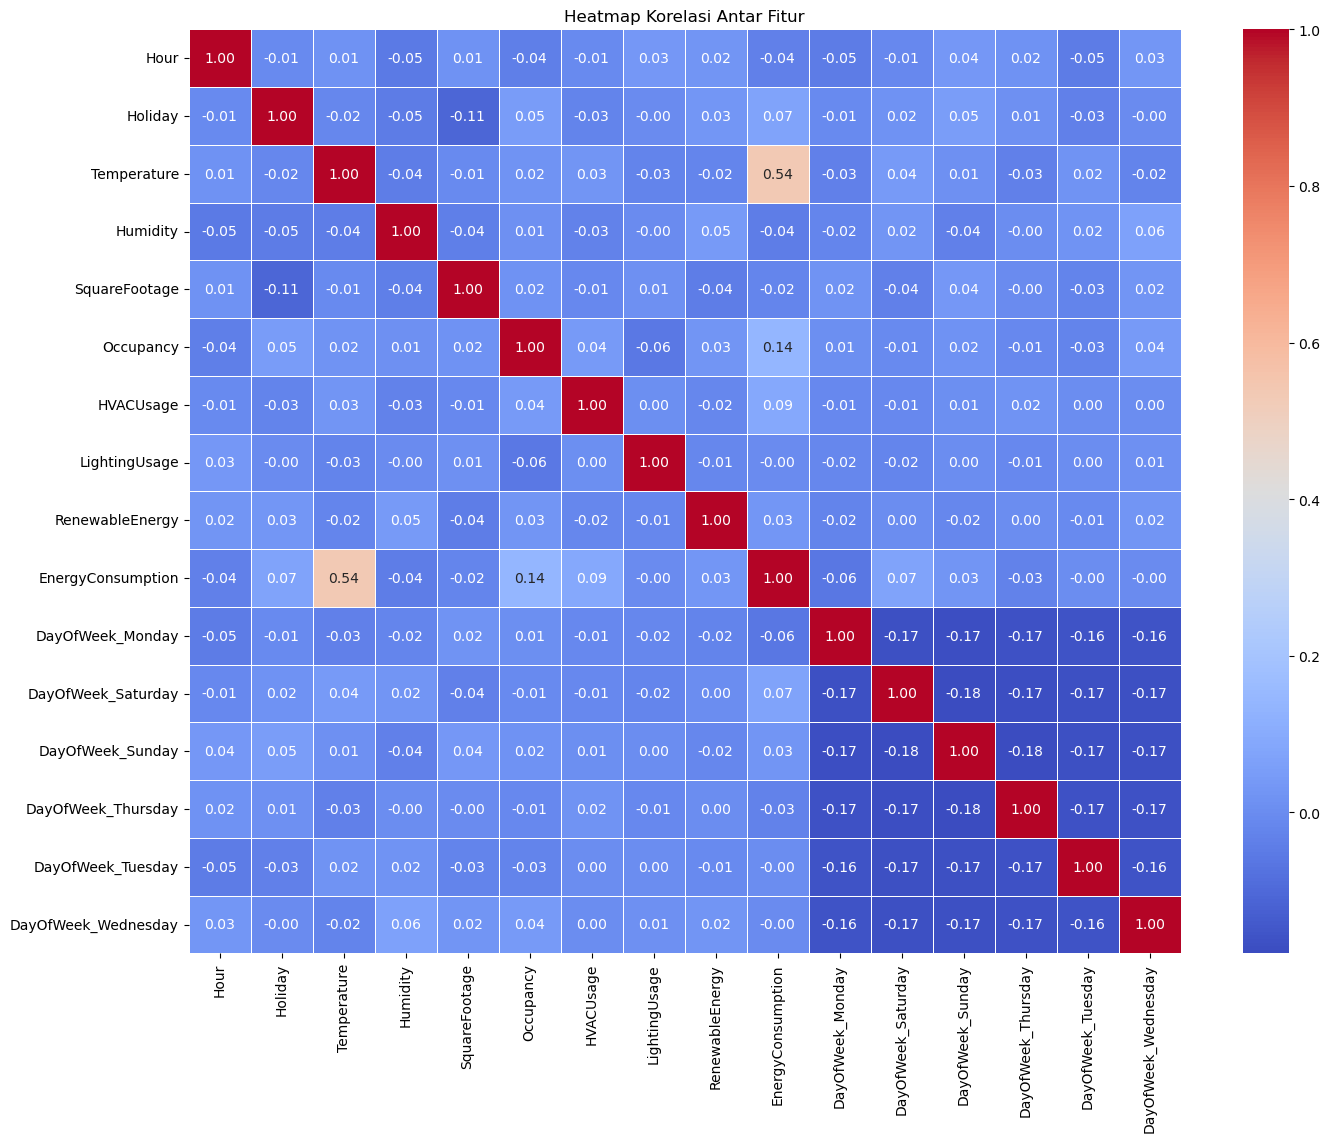

In [161]:
plt.figure(figsize=(16, 12))

corr_matrix = data.select_dtypes(include='number').corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

### preprocessing

#### memisahkan fitur(x) dan target variable(y) variables 

In [54]:
X = data.drop(columns=['EnergyConsumption'])  
y = data['EnergyConsumption']  

x = fitur
y = target variable

#### split data untuk training, validation, dan test sets

In [57]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")
print(f"Total data: {len(data)}")

Train size: 862
Validation size: 123
Test size: 247
Total data: 1232


membagi proporsi data menjadi 70% untuk training, 10% validation, dan 20% untuk test

#### cek apa ada overlap

In [60]:
train_idx = set(X_train.index)
val_idx = set(X_val.index)
test_idx = set(X_test.index)

print("Overlap Train & Val:", len(train_idx.intersection(val_idx)))
print("Overlap Train & Test:", len(train_idx.intersection(test_idx)))
print("Overlap Val & Test:", len(val_idx.intersection(test_idx)))

Overlap Train & Val: 0
Overlap Train & Test: 0
Overlap Val & Test: 0


tidak ada data yang terduplikat antar subsetnya (hanya untuk memastikan tidak ada leakage)

#### standard scaler

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Setelah data dibagi menjadi train, validation, dan test set, dilakukan proses standarisasi fitur menggunakan `StandardScaler` dari `sklearn.preprocessing` .tujuannya adalah untuk menyamakan skala antar fitur agar model deep learning dapat belajar secara lebih optimal.

#### cek shape

In [66]:
X_train.shape, X_val.shape, X_test.shape

((862, 16), (123, 16), (247, 16))

hasil splitting

#### mengubah seluruh data menjadi datatype 'float32' 

In [72]:
X_train = np.array(X_train).astype('float32')
X_val = np.array(X_val).astype('float32')
X_test = np.array(X_test).astype('float32')

y_train = np.array(y_train).astype('float32')
y_val = np.array(y_val).astype('float32')
y_test = np.array(y_test).astype('float32')

seluruh data diubah ke float32 karena lebih optimal untuk training speed dan RAM usage. dan framework TensorFlow lebih efisien di datatype float32

#### cek apakah ada missing value sebelum masuk ke model

In [75]:
print(np.isnan(y_train).sum())

3


#### hapus missing value

In [78]:
Xy_train = pd.DataFrame(X_train)
Xy_train['target'] = y_train

Xy_train.dropna(inplace=True)

X_train = Xy_train.drop(columns=['target']).values.astype('float32')
y_train = Xy_train['target'].values.astype('float32')

print(np.isnan(y_train).sum())

0


kita hapus karena data missing valuenya hanya ada 3
-> dilakukan dengan ubah ke dataframe sementara lalu drop baris yg ada nan nya dan terakhir pisahkan kembali 

## 1.B

### model sequential

In [88]:
input_dim = X_train.shape[1]
print(input_dim)

model_seq = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),   
    Dense(58, activation='relu'),   
    Dense(1) 
])

model_seq.compile(
    optimizer=Adam(),
    loss='mse',          
    metrics=['mae', 'mse']
)

history_seq = model_seq.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

16
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 5651.0552 - mae: 74.6177 - mse: 5651.0552 - val_loss: 5135.9268 - val_mae: 70.9328 - val_mse: 5135.9268
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4938.8086 - mae: 69.6151 - mse: 4938.8086 - val_loss: 4052.6208 - val_mae: 62.7966 - val_mse: 4052.6208
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3733.1482 - mae: 60.2480 - mse: 3733.1482 - val_loss: 2545.8542 - val_mae: 49.2147 - val_mse: 2545.8542
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2185.4714 - mae: 45.2165 - mse: 2185.4714 - val_loss: 1080.9814 - val_mae: 30.4706 - val_mse: 1080.9814
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 899.4562 - mae: 26.8267 - mse: 899.4562 - val_loss: 302.4004 - val_mae: 14.0249 - val_mse: 302.4004
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 245.5106 - mae: 12.7652 - mse: 245.5106 - val_loss: 142.5963 - val_mae: 9.5683 - val_mse: 142.5963
Epoch 7/10
27/27 ━━━━━━━━━━━

baris pertama adalah menghitung jumlah input(ada 29 fitur)

lalu berikutnya membuat model sequential pada model_seq = sequential([  ])
<br>-> Dense(64, activation='relu') = hidden layer 1 (minimal 2x dari input_dim atau  si fiturnya)
<br>-> Dense(58, activation='relu') = hidden layer 2
<br>-> Dense(1) = output layer untuk regresi (tanpa aktivasi)

setelah itu langkah model_seq.compile digunakan untuk menentukan bagaimana model akan belajar dari data
<br>-> loss = untuk mengukur seberapa jauh prediksi model dari nilai sebenarnya (menggunakan mse karna cocok untuk regresi dan sensitif terhadap outlier)<br>-> metrics = untuk evaluasi model (mae dan mse digunakan untuk memantau performa selama training dan validasi)

terakhir model_seq.fit yaitu training data
<br>-> validation_data=(X_val, y_val) = data validasi yang digunakan untuk mengevaluasi performa model setelah setiap epoch (tidak mempengaruhi bobot model)
<br>-> batch_size=32 = jumlah data yang digunakan dalam satu kali update weight (32=mini-batch -> lebih efisien dan stabil)
<br>-> verbose=1 = nampilin progress training di console (0=tidak ada, 1=ada progress bar, 2=ada per baris per epoch)

#### visualisasi learning curve (MAE)

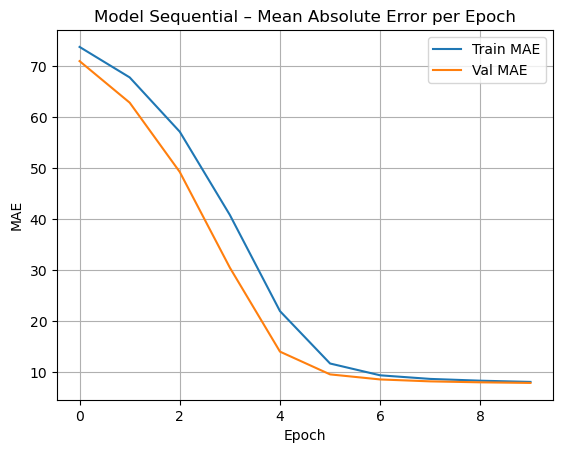

In [94]:
plt.plot(history_seq.history['mae'], label='Train MAE')
plt.plot(history_seq.history['val_mae'], label='Val MAE')
plt.title('Model Sequential – Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

interpretasi
<br>-> penurunan MAE training dan validation secara drastis dari epoch awal menunjukkan bahwa model berhasil belajar dengan baik
<br>-> nilai MAE stabil dan saling mendekati menjelang akhir epoch menunjukkan bahwa model belum mengalami overviting yang signifikan

### model functional

In [97]:
input_dim = X_train.shape[1]  

inputs = Input(shape=(input_dim,))  

x = Dense(64, activation='relu')(inputs)
x = Dense(58, activation='relu')(x)  

outputs = Dense(1)(x)

model_func = Model(inputs=inputs, outputs=outputs)

model_func.compile(
    optimizer=Adam(),
    loss='mse', 
    metrics=['mae', 'mse']
)

history_func = model_func.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 5825.7358 - mae: 75.7033 - mse: 5825.7358 - val_loss: 5414.7319 - val_mae: 72.8246 - val_mse: 5414.7319
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5365.3579 - mae: 72.6067 - mse: 5365.3579 - val_loss: 4539.4927 - val_mae: 66.4491 - val_mse: 4539.4927
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4270.4639 - mae: 64.5467 - mse: 4270.4639 - val_loss: 3178.9675 - val_mae: 55.0630 - val_mse: 3178.9675
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2917.6245 - mae: 52.6987 - mse: 2917.6245 - val_loss: 1633.6505 - val_mae: 38.1714 - val_mse: 1633.6505
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1336.8020 - mae: 34.3682 - mse: 1336.8020 - val_loss: 544.2861 - val_mae: 20.1594 - val_mse: 544.2861
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 412.4427 - mae: 16.9823 - mse: 412.4427 - val_loss: 187.8734 - val_mae: 10.9969 - val_mse: 187.8734
Epoch 7/10
27/27 ━━━━━━━━━━━

input Layer:  
didefinisikan menggunakan Input(shape=(input_dim,)). menyebutkan input secara langsung karena menggunakan functional API

output Layer:  
-> menghasilkan output tunggal (1 neuron) tanpa aktivasi karena ini adalah kasus regresi.

hidden layer & model.compile sama dengan model sequential

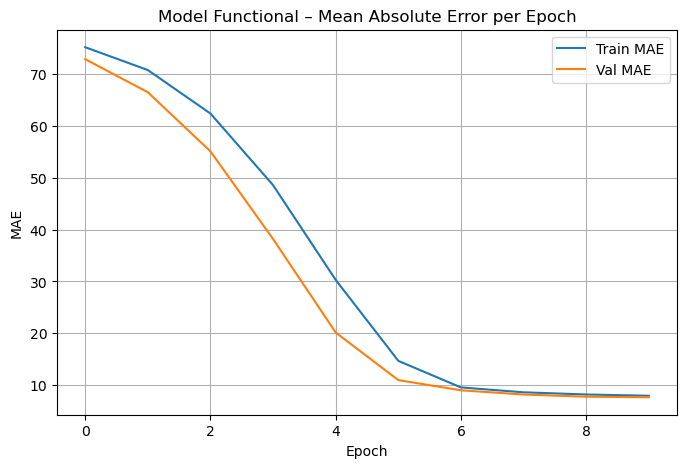

In [99]:
plt.figure(figsize=(8, 5))
plt.plot(history_func.history['mae'], label='Train MAE')
plt.plot(history_func.history['val_mae'], label='Val MAE')
plt.title('Model Functional – Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

interpretasi: mirip dengan sequential tapi hasinya lebih bagus, bisa dilihat dari epoch 4 nilainya lebih kecil

## 2.C

#### sequential model modification

In [147]:
model_seq_mod = Sequential([
    Input(shape=(X_train.shape[1],)),       
    Dense(128, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model_seq_mod.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mae', 'mse']
)

history_seq_mod = model_seq_mod.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)



Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 5839.3721 - mae: 75.8458 - mse: 5839.3721 - val_loss: 5438.3652 - val_mae: 73.0350 - val_mse: 5438.3652
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5274.9438 - mae: 71.9938 - mse: 5274.9438 - val_loss: 4310.4023 - val_mae: 64.8374 - val_mse: 4310.4028
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3788.2061 - mae: 60.6254 - mse: 3788.2061 - val_loss: 1865.8981 - val_mae: 41.5340 - val_mse: 1865.8981
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1231.8397 - mae: 32.2348 - mse: 1231.8397 - val_loss: 250.2378 - val_mae: 13.0412 - val_mse: 250.2378
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 210.9431 - mae: 11.6951 - mse: 210.9431 - val_loss: 153.8906 - val_mae: 10.1860 - val_mse: 153.8906
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 120.4234 - mae: 8.8009 - mse: 120.4234 - val_loss: 132.2886 - val_mae: 9.3787 - val_mse: 132.2886
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━

modifikasi dilakukan pada model baseline Sequential dengan beberapa perubahan:
- jumlah hidden layer dari 2 menjadi 3
- jumlah neuron diperbesar: 128 → 64 → 32
- activation function dari hidden layer pertama diubah dari ReLU ke tanh
- jumlah epoch ditingkatkan dari 10 menjadi 20

#### functional model modification

In [150]:
inputs_mod = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(inputs_mod)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs_mod = Dense(1)(x)

model_func_mod = Model(inputs=inputs_mod, outputs=outputs_mod)

model_func_mod.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mae', 'mse']
)

history_func_mod = model_func_mod.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5835.7109 - mae: 75.8251 - mse: 5835.7109 - val_loss: 5277.5449 - val_mae: 71.8865 - val_mse: 5277.5449
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4918.9434 - mae: 69.4283 - mse: 4918.9434 - val_loss: 2951.4375 - val_mae: 53.1093 - val_mse: 2951.4375
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2113.0237 - mae: 43.3466 - mse: 2113.0237 - val_loss: 182.5472 - val_mae: 10.6154 - val_mse: 182.5472
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 169.4798 - mae: 10.4708 - mse: 169.4798 - val_loss: 105.8223 - val_mae: 8.2509 - val_mse: 105.8223
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 109.3871 - mae: 8.4430 - mse: 109.3871 - val_loss: 88.7218 - val_mae: 7.5610 - val_mse: 88.7218
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 96.5537 - mae: 7.8890 - mse: 96.5537 - val_loss: 86.3613 - val_mae: 7.5143 - val_mse: 86.3613
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

modifikasi yang dilakukan pada model functional baseline 
- menambahkan 1 hidden layer → total 3 hidden layers
- jumlah neuron diperbesar: 128 → 64 → 32
- jumlah epoch dinaikkan dari 10 ke 20
<br>(sama seperti sequential)

## evaluasi dari 4 model

In [154]:
# Evaluasi untuk Sequential Baseline
y_pred_seq = model_seq.predict(X_test)
mse_seq = mean_squared_error(y_test, y_pred_seq)
rmse_seq = np.sqrt(mse_seq)
mae_seq = np.mean(np.abs(y_test - y_pred_seq))

evaluation_results = {
    'Sequential Baseline': {
        'MAE': mae_seq,
        'MSE': mse_seq,
        'RMSE': rmse_seq
    }
}

# Evaluasi untuk Functional Baseline
y_pred_func = model_func.predict(X_test)
mse_func = mean_squared_error(y_test, y_pred_func)
rmse_func = np.sqrt(mse_func)
mae_func = np.mean(np.abs(y_test - y_pred_func))

evaluation_results['Functional Baseline'] = {
    'MAE': mae_func,
    'MSE': mse_func,
    'RMSE': rmse_func
}

# Evaluasi untuk Sequential Modified
y_pred_seq_mod = model_seq_mod.predict(X_test)
mse_seq_mod = mean_squared_error(y_test, y_pred_seq_mod)
rmse_seq_mod = np.sqrt(mse_seq_mod)
mae_seq_mod = np.mean(np.abs(y_test - y_pred_seq_mod))

evaluation_results['Sequential Modified'] = {
    'MAE': mae_seq_mod,
    'MSE': mse_seq_mod,
    'RMSE': rmse_seq_mod
}

# Evaluasi untuk Functional Modified
y_pred_func_mod = model_func_mod.predict(X_test)
mse_func_mod = mean_squared_error(y_test, y_pred_func_mod)
rmse_func_mod = np.sqrt(mse_func_mod)
mae_func_mod = np.mean(np.abs(y_test - y_pred_func_mod))

evaluation_results['Functional Modified'] = {
    'MAE': mae_func_mod,
    'MSE': mse_func_mod,
    'RMSE': rmse_func_mod
}

results_df = pd.DataFrame(evaluation_results).T
print(results_df)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
                          MAE         MSE       RMSE
Sequential Baseline  9.746125  103.636635  10.180208
Functional Baseline  9.179271   88.827301   9.424824
Sequential Modified  8.419146   66.695992   8.166761
Functional Modified  8.549415   72.813538   8.533085


Analisis Hasil:

MAE (Mean Absolute Error):

Sequential Baseline memiliki MAE tertinggi, yaitu 9.746, yang menunjukkan bahwa prediksi model ini memiliki kesalahan absolut yang lebih besar dibandingkan dengan model-model lainnya.

Functional Baseline memiliki MAE yang lebih rendah (9.179) dibandingkan dengan Sequential Baseline, menandakan bahwa model fungsional lebih baik dalam mengurangi kesalahan prediksi pada data pelatihan dan validasi.

Sequential Modified memberikan MAE terbaik, yaitu 8.419, yang menunjukkan bahwa modifikasi model Sequential berhasil meningkatkan akurasi prediksi secara signifikan.

Functional Modified, meskipun lebih baik daripada Functional Baseline, menunjukkan MAE yang lebih tinggi (8.549) dibandingkan dengan Sequential Modified. Ini menunjukkan bahwa meskipun model Functional Modified lebih baik daripada model Functional Baseline, Sequential Modified masih memberikan hasil yang lebih baik dalam hal MAE.

MSE (Mean Squared Error):

Sequential Baseline memiliki MSE yang sangat tinggi (103.636), yang menunjukkan bahwa model ini memiliki kesalahan kuadrat yang besar, mempengaruhi prediksi pada nilai yang lebih ekstrem.

Functional Baseline memiliki MSE yang lebih rendah (88.827), menunjukkan bahwa model Functional lebih efektif dalam meminimalkan kesalahan kuadrat dibandingkan dengan model Sequential pada dataset ini.

Sequential Modified juga menunjukkan perbaikan yang signifikan, dengan MSE yang lebih rendah (66.696) dibandingkan dengan model Functional Modified yang memiliki MSE 72.814. Ini menandakan bahwa modifikasi pada model Sequential lebih berhasil dalam meminimalkan kesalahan kuadrat.

RMSE (Root Mean Squared Error):

Sequential Baseline memiliki RMSE yang tertinggi (10.180), menunjukkan bahwa model ini memiliki tingkat kesalahan yang lebih tinggi dalam prediksi.

Functional Baseline memiliki RMSE yang lebih rendah (9.425), tetapi tidak sebesar perbaikan yang terlihat pada model Sequential Modified yang menunjukkan RMSE 8.168. Ini menunjukkan bahwa modifikasi pada model Sequential juga menghasilkan pengurangan kesalahan pada data.

Functional Modified memiliki RMSE 8.533, sedikit lebih buruk daripada Sequential Modified, meskipun kedua model ini menunjukkan pengurangan kesalahan yang cukup signifikan dibandingkan dengan Sequential Baseline dan Functional Baseline.


perbandingan antar model:
- Peningkatan dengan Modifikasi: Modifikasi pada model Sequential memberikan peningkatan yang lebih signifikan dibandingkan dengan modifikasi pada model Functional. Ini terlihat dari penurunan yang lebih besar pada MAE, MSE, dan RMSE pada Sequential Modified dibandingkan dengan Functional Modified.

 - Kompleksitas Model: Meskipun model Functional lebih kompleks dan berpotensi lebih kuat, modifikasi pada model Sequential yang lebih sederhana memberikan hasil yang lebih baik pada dataset ini. Hal ini menunjukkan bahwa dalam beberapa kasus, model yang lebih sederhana (sequential) yang telah dimodifikasi dengan tepat dapat lebih efektif daripada model yang lebih kompleks (functional).



Kesimpulan:

- Model Sequential Modified memberikan hasil terbaik dengan MAE, MSE, dan RMSE yang lebih rendah dibandingkan dengan model-model lainnya. Ini menunjukkan bahwa modifikasi pada model Sequential telah menghasilkan prediksi yang lebih akurat dan optimal.

- Model Functional Modified meskipun lebih kompleks, tidak memberikan perbaikan yang cukup signifikan dibandingkan dengan Sequential Modified. Hal ini menunjukkan bahwa untuk kasus ini, model yang lebih sederhana dapat lebih efisien dalam mengurangi kesalahan.

- Model Baseline (baik Sequential maupun Functional) menunjukkan performa yang lebih buruk dibandingkan dengan model Modified, yang menandakan pentingnya melakukan modifikasi pada arsitektur model untuk meningkatkan akurasi prediksi.


Dengan demikian, untuk tugas ini, Sequential Modified adalah model yang paling direkomendasikan berdasarkan evaluasi yang dilakukan.